<a href="https://colab.research.google.com/github/Bagyalakshmi1429/Deep-Learning/blob/main/DL_2348515_Lab_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CREDIT CARD FRAUD DETECTION**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/creditcard.csv')

In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

PRE-PROCESSING

In [ ]:
#Scaling numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Time', 'Amount']] = scaler.fit_transform(df[['Time', 'Amount']])

In [ ]:
#Splitting the dataset into training and testing sets

from sklearn.model_selection import train_test_split

X = df.drop('Class', axis=1)  # Features
y = df['Class']  # Target variable

scalar = StandardScaler()

X_train_v, X_test, y_train_v, y_test = train_test_split(X, y,
                                                    test_size=0.3, random_state=42)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_v, y_train_v,
                                                            test_size=0.2, random_state=42)

X_train = scalar.fit_transform(X_train)
X_validate = scalar.transform(X_validate)
X_test = scalar.transform(X_test)

w_p = y_train.value_counts()[0] / len(y_train)
w_n = y_train.value_counts()[1] / len(y_train)

print(f"Fraudulant transaction weight: {w_n}")
print(f"Non-Fraudulant transaction weight: {w_p}")


Fraudulant transaction weight: 0.0017994745785028623
Non-Fraudulant transaction weight: 0.9982005254214972


In [ ]:
print(f"TRAINING: X_train: {X_train.shape}, y_train: {y_train.shape}\n{'_'*55}")
print(f"VALIDATION: X_validate: {X_validate.shape}, y_validate: {y_validate.shape}\n{'_'*50}")
print(f"TESTING: X_test: {X_test.shape}, y_test: {y_test.shape}")

TRAINING: X_train: (159491, 30), y_train: (159491,)
_______________________________________________________
VALIDATION: X_validate: (39873, 30), y_validate: (39873,)
__________________________________________________
TESTING: X_test: (85443, 30), y_test: (85443,)


MLP

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# Define the model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(30,)),  # Update input_shape to match the number of features
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
#optimizer1
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
print(X_train.shape)
print(X_test.shape)


(159491, 30)
(85443, 30)


In [ ]:
#Training the model
history = model.fit(X_train, y_train, epochs=20, batch_size=512, validation_data=(X_test, y_test))


Epoch 1/20
312/312 [==============================] - 3s 5ms/step - loss: 0.0580 - accuracy: 0.9842 - val_loss: 0.0046 - val_accuracy: 0.9993
Epoch 2/20
312/312 [==============================] - 1s 5ms/step - loss: 0.0060 - accuracy: 0.9991 - val_loss: 0.0036 - val_accuracy: 0.9994
Epoch 3/20
312/312 [==============================] - 1s 4ms/step - loss: 0.0048 - accuracy: 0.9992 - val_loss: 0.0031 - val_accuracy: 0.9994
Epoch 4/20
312/312 [==============================] - 2s 6ms/step - loss: 0.0042 - accuracy: 0.9993 - val_loss: 0.0031 - val_accuracy: 0.9993
Epoch 5/20
312/312 [==============================] - 2s 7ms/step - loss: 0.0042 - accuracy: 0.9993 - val_loss: 0.0029 - val_accuracy: 0.9994
Epoch 6/20
312/312 [==============================] - 1s 5ms/step - loss: 0.0039 - accuracy: 0.9993 - val_loss: 0.0028 - val_accuracy: 0.9995
Epoch 7/20
312/312 [==============================] - 1s 5ms/step - loss: 0.0037 - accuracy: 0.9994 - val_loss: 0.0027 - val_accuracy: 0.9995
Epoch 

In [ ]:
#optimizer2
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# Using a different learning rate
sgd = keras.optimizers.SGD(learning_rate=0.01)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Evaluation
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  # Convert probabilities to binary predictions
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred))


2671/2671 [==============================] - 7s 3ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.86      0.81      0.83       136

    accuracy                           1.00     85443
   macro avg       0.93      0.90      0.92     85443
weighted avg       1.00      1.00      1.00     85443

[[85289    18]
 [   26   110]]
ROC-AUC: 0.9043062633988385


VISUALIZATION

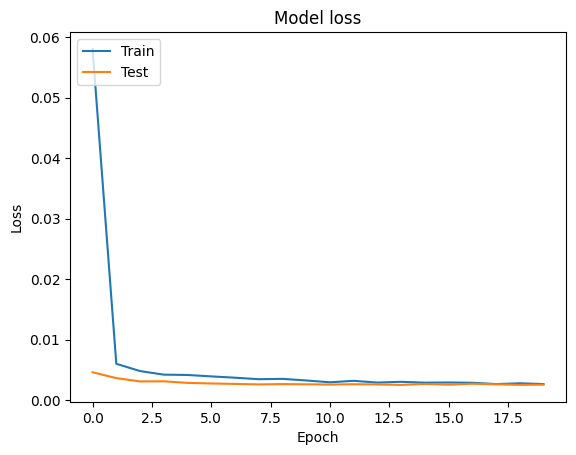

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()



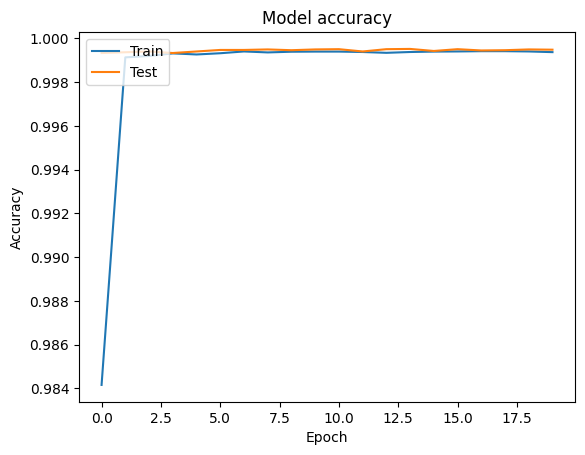

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()